In [2]:
import os
from glob import glob

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from torch.utils.data import Dataset, DataLoader

import numpy as np
from PIL import Image

from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [3]:
seed = 1
lr = 0.001
momentum = 0.5

batch_size = 64
test_batch_size = 64

epochs = 1
no_cuda = False
log_interval = 100

In [9]:
train_paths = glob('/content/mydrive/MyDrive/dataset/mnist_png/training/*/*.png')
test_paths = glob('/content/mydrive/MyDrive/dataset/mnist_png/testing/*/*.png')
len(train_path), len(test_path)

(60000, 10000)

# Preprocess

In [42]:
class Datset(Dataset):
  def __init__(self, data_paths, transform=None):

    self.data_paths = data_paths
    self.transform = transform
  
  def __len__(self):
    return len(self.data_paths)

  def __getitem__(self, idx):
    path = self.data_paths[idx]
    image = Image.open(path).convert('L')
    label = int(path.split('\\')[-2])

    if self.trainsform:
      image = self.transform(image)

    return image, label

In [43]:
train_loader = torch.utils.data.DataLoader(
    Dataset(train_paths,
            transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(
                mean = [0.406],
                std = [0.225]
            )
            ])),
            batch_size = batch_size,
            shuffle=True)

# Understand Better

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
path = '/content/mydrive/MyDrive/Colab Notebooks/target.jpg'

In [29]:
image = Image.open(path)

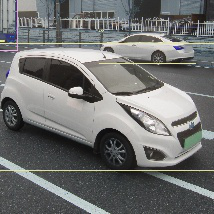

In [30]:
image

In [31]:
import torchvision

In [32]:
np.array(image).shape

(214, 214, 3)

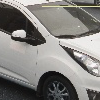

In [33]:
torchvision.transforms.CenterCrop(size=(100,100))(image)

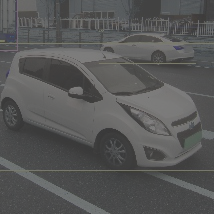

In [34]:
torchvision.transforms.ColorJitter(brightness=0.5,contrast=1, saturation=0, hue=0)(image)

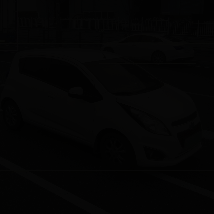

In [35]:
torchvision.transforms.ColorJitter(brightness=1,contrast=1, saturation=1, hue=0)(image)

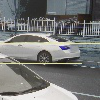

In [39]:
torchvision.transforms.FiveCrop(size=(100,100))(image)[1]

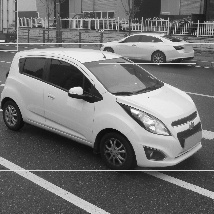

In [46]:
torchvision.transforms.Grayscale(num_output_channels = 1)(image)

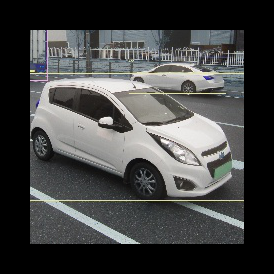

In [49]:
torchvision.transforms.Pad(padding=(30, 30), fill=0, padding_mode='constant')(image)

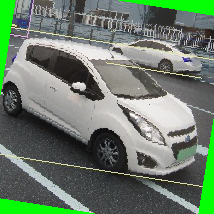

In [51]:
torchvision.transforms.RandomAffine(degrees=90, fillcolor=(5,255,5))(image)

In [52]:
transforms = [torchvision.transforms.Grayscale(num_output_channels = 1),
              torchvision.transforms.CenterCrop(size=(100,100)),
              torchvision.transforms.RandomAffine(degrees=90, fillcolor=(5,255,5))]

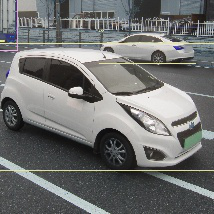

In [54]:
torchvision.transforms.RandomApply(transforms, p=0.5)(image)
#p=0.5 확률

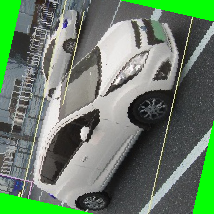

In [55]:
torchvision.transforms.RandomChoice(transforms)(image) #transforms안에 무작위로 한개 선택함

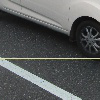

In [56]:
torchvision.transforms.RandomCrop(size=(100,100))(image)

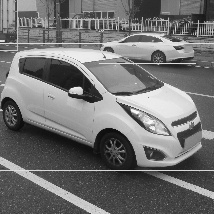

In [57]:
torchvision.transforms.RandomGrayscale(p=0.5)(image)

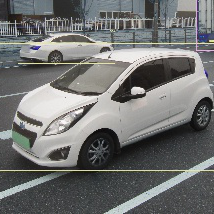

In [61]:
torchvision.transforms.RandomHorizontalFlip(p=0.5)(image)

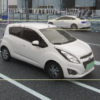

In [64]:
torchvision.transforms.Resize((100,100))(image)

# **Transform on Tensor**

In [65]:
tensor = torchvision.transforms.ToTensor()(image)

In [66]:
trans = torchvision.transforms.Normalize(mean=(0,0,0), std=(1,1,1))(tensor)

In [68]:
np.min(image), np.max(image)

(0, 255)

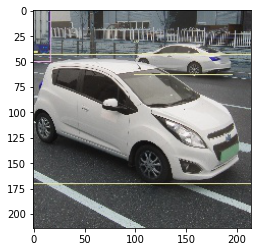

In [67]:
plt.imshow(trans.numpy().transpose(1,2,0))
plt.show()

In [69]:
np.min(trans.numpy()), np.max(trans.numpy())

(0.0, 1.0)

In [71]:
trans.numpy().transpose(1, 2, 0).shape

(214, 214, 3)

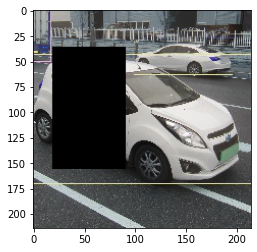

In [70]:
trans = torchvision.transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0)(tensor)

plt.imshow(trans.numpy().transpose(1, 2, 0))
plt.show()